In [ ]:
pip install torch matplotlib

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
words=open('names.txt','r').read().splitlines()


In [ ]:
chars=sorted(list(set(''.join(words))))
stoi={s:i+1 for i, s in enumerate(chars) }
stoi['.']=0
itos={i:s for s, i  in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:
#build the dataset
block_size=3 # context length , how many characters  do we take to predict the next one
X,Y = [],[]

for w in words[:5]:
  print(w)
  context=block_size*[0]
  for ch in w + ".":
    ix=stoi[ch]
    X.append(context)
    Y.append(ix)

    print(''.join(itos[i] for i in context),'-->',ch)
    context=context[1:]+[ix]

X=torch.tensor(X)
Y=torch.tensor(Y)



emma
... --> e
..e --> m
.em --> m
emm --> a
mma --> .
olivia
... --> o
..o --> l
.ol --> i
oli --> v
liv --> i
ivi --> a
via --> .
ava
... --> a
..a --> v
.av --> a
ava --> .
isabella
... --> i
..i --> s
.is --> a
isa --> b
sab --> e
abe --> l
bel --> l
ell --> a
lla --> .
sophia
... --> s
..s --> o
.so --> p
sop --> h
oph --> i
phi --> a
hia --> .


In [ ]:
X.dtype,Y.dtype,X.shape,Y.shape

(torch.int64, torch.int64, torch.Size([32, 3]), torch.Size([32]))

In [ ]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [ ]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [ ]:
C=torch.randn((27,2))

In [ ]:
C

tensor([[ 0.6284, -1.0050],
        [-0.5501, -0.1803],
        [-0.2569, -1.2609],
        [-1.3932, -0.2579],
        [-1.5214,  1.3491],
        [-0.6842, -0.3092],
        [ 1.3876,  0.1532],
        [ 1.0212,  0.1189],
        [-1.3516,  0.0431],
        [ 0.7169, -0.5086],
        [ 1.4976, -0.3509],
        [ 0.8028,  1.3017],
        [ 0.7047,  0.8074],
        [-0.3149,  0.8346],
        [ 0.8491, -0.0478],
        [-1.2469, -0.1951],
        [-1.6911,  2.7674],
        [ 0.4800, -0.6123],
        [ 1.9359, -0.3627],
        [-0.9777, -1.0405],
        [ 0.1136,  1.2597],
        [ 0.4738,  0.2020],
        [ 2.0621, -0.8552],
        [-0.3238, -1.4208],
        [-0.8583,  0.1805],
        [ 0.8866, -0.4371],
        [-0.0358,  0.8756]])

In [ ]:
emb=C[X]
emb.shape

torch.Size([32, 3, 2])

In [ ]:
torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]],1).shape

torch.Size([32, 6])

In [ ]:
#very inefficient , because it will create a whole new tensor, whereas in view only logical manipulation takes place
torch.cat(torch.unbind(emb,1),1).shape

torch.Size([32, 6])

In [ ]:
emb.view(32,6).shape

torch.Size([32, 6])

In [ ]:
W1=torch.randn((6,100))
b1=torch.randn((100))

In [ ]:
#here broadcasting takes place vertically

# 32 100
# 1  100

# so same bias will be added to every row vector

h=torch.tanh(emb.view(-1,6)@W1 + b1)


In [ ]:
h.shape

torch.Size([32, 100])

In [ ]:
W2=torch.randn((100,27))
b2=torch.randn((27))

In [ ]:
logits= h @ W2 + b2
logits

tensor([[ -2.2837,   2.3021, -10.2466, -14.2698, -13.8874, -16.5371,  -5.9134,
          -5.1576,  -2.2584,   5.1569,  -0.3051,  17.6188, -13.4594, -14.0204,
          12.1585,  -8.7498,   9.8475,  -8.8329,   7.4412,   2.2426,  -1.2279,
          22.8348,  -9.0396, -15.8556,   2.7212,  11.4457,  -7.2434],
        [ -0.7549,  -5.1957,  -9.3951,  -3.5593,  -0.9498, -16.7695,   4.3597,
           1.6337,   3.8639,   5.6066,  -5.1340,  16.2706, -17.7828, -10.0357,
           4.0650,  -2.5539,  18.5781,   2.2927,   3.6937,  -0.1357,   3.0242,
           9.9727,  -4.7561,  -2.4961,  -3.4993,  14.2908,  -6.1497],
        [ -2.5005,  -3.2303, -15.9863,   1.2100,  -4.5930,   0.5225,  13.9877,
          -9.3822,  14.2251,  -0.4824,   9.4023,  10.4142, -13.8890,   2.6313,
          -5.4930,  19.6387,  11.5900,   5.0469,   3.2175,  -5.2179,   0.1245,
          -2.9876,   1.1150,   0.3569, -15.3123,  22.0971,  10.3206],
        [-11.5139,  -0.3210,  -6.9639,   6.5357,  -3.4296,  10.0474,  19.0358,


In [ ]:
logits.shape

torch.Size([32, 27])

In [ ]:
counts=logits.exp()
probs=counts/counts.sum(1,keepdims=True)

In [ ]:
probs.shape

torch.Size([32, 27])

In [ ]:
probs[0].sum()

tensor(1.)

In [ ]:
#negative log likelihood
loss=-probs[torch.arange(32),Y].log().mean()
loss

tensor(21.0684)

# EVERYTHING TOGETHER

In [ ]:
import torch.nn.functional as F

In [ ]:
#build the dataset
block_size=3 # context length , how many characters  do we take to predict the next one
X,Y = [],[]

for w in words:
  context=block_size*[0]
  for ch in w + ".":
    ix=stoi[ch]
    X.append(context)
    Y.append(ix)

    context=context[1:]+[ix]

X=torch.tensor(X)
Y=torch.tensor(Y)



In [ ]:
# Dataset
X.shape,Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [ ]:
g=torch.Generator().manual_seed(2147483647)
C=torch.randn((27,2),generator=g)
W1=torch.randn((6,300))
b1=torch.randn((300))
W2=torch.randn((300,27))
b2=torch.randn((27))
parameters=[C,W1,b1,W2,b2]


In [ ]:
sum(p.nelement() for p in parameters)

10281

In [ ]:
for p in parameters:
  p.requires_grad=True

In [ ]:
lre=torch.linspace(-3,0,1000)
lrs=10**lre

In [ ]:
lri=[]
lossi=[]
for i in range(100000):

  #mini batch construct
  ix=torch.randint(0,X.shape[0],(32,))



  #forward pass
  emb=C[X[ix]] # (32,3,2)
  h=torch.tanh(emb.view(-1,6)@W1 + b1) #(32,100)
  logits= h @ W2 + b2  # (32,27)
  loss=F.cross_entropy(logits,Y[ix])  #numerically well behaved , kernels are kind of fused so aggregate operations takes place which are efficient
  # print(f'Loss at the {i}th iteration is :{loss}')

  #backward pass
  for p in parameters:
    p.grad=None
  loss.backward()

  #update
  # lr=lrs[i]
  lr=10**-1
  for p in parameters:
    p.data+=-lr*p.grad


  #track stats
  # lri.append(lre[i])
  # lossi.append(loss.detach())



# print(loss.item())

emb=C[X] # (32,3,3)
h=torch.tanh(emb.view(-1,6)@W1 + b1) #(32,100)
logits= h @ W2 + b2  # (32,27)
actual_loss=F.cross_entropy(logits,Y)
print(actual_loss)

tensor(2.3501, grad_fn=<NllLossBackward0>)


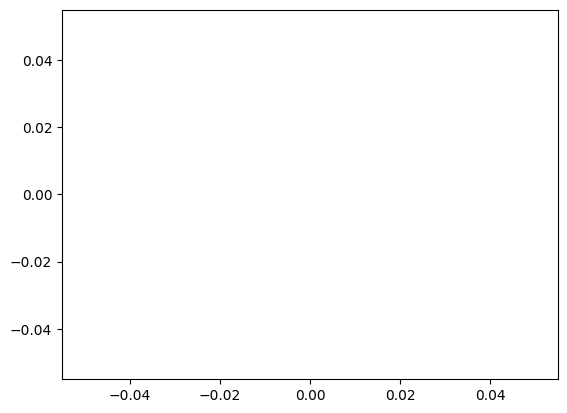

In [ ]:
#finding optimal learning rate  by looking at the graph
plt.plot(lri,lossi)

In [ ]:
# training split , dev/validation split , test split
# 80% , 10% , 10%

def build_dataset(words):
  #build the dataset
  block_size=3 # context length , how many characters  do we take to predict the next one
  X,Y = [],[]

  for w in words:
    context=block_size*[0]
    for ch in w + ".":
      ix=stoi[ch]
      X.append(context)
      Y.append(ix)

      context=context[1:]+[ix]

  X=torch.tensor(X)
  Y=torch.tensor(Y)

  return X,Y

import random
random.seed(42)
n1=int(0.8*len(words))
n2=int(0.9*len(words))

Xtr,Ytr=build_dataset(words[:n1])
Xdev,Ydev=build_dataset(words[n1:n2])
Xte,Yte=build_dataset(words[n2:])


In [ ]:
Xdev.shape, Ydev.shape

(torch.Size([22633, 3]), torch.Size([22633]))

In [ ]:
len(words)
n1

25626

In [ ]:
g=torch.Generator().manual_seed(2147483647)
C=torch.randn((27,10),generator=g)
W1=torch.randn((30,200))
b1=torch.randn((200))
W2=torch.randn((200,27))
b2=torch.randn((27))
parameters=[C,W1,b1,W2,b2]


In [ ]:
sum(p.nelement() for p in parameters)

11897

In [ ]:
for p in parameters:
  p.requires_grad=True

In [ ]:
stepi=[]
lossi=[]

In [ ]:
#training on the training set
lr=10**-1
for i in range(100000):

  #mini batch construct
  ix=torch.randint(0,Xtr.shape[0],(32,))



  #forward pass
  emb=C[Xtr[ix]] # (32,3,10)
  h=torch.tanh(emb.view(-1,30)@W1 + b1) #(32,200)
  logits= h @ W2 + b2  # (32,27)
  loss=F.cross_entropy(logits,Ytr[ix])  #numerically well behaved , kernels are kind of fused so aggregate operations takes place which are efficient
  # print(f'Loss at the {i}th iteration is :{loss}'

  stepi.append(i)
  lossi.append(loss.detach())
  #backward pass
  for p in parameters:
    p.grad=None
  loss.backward()


  #update
  for p in parameters:
    p.data+=-lr*p.grad
  lr=lr*(1-(10**-(i+1)))


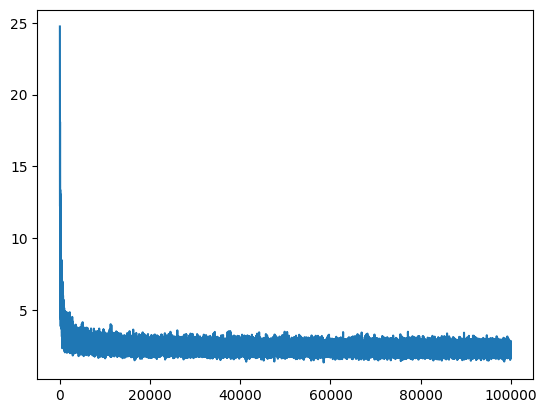

In [ ]:
plt.plot(stepi,lossi)

In [ ]:
#taking loss on test set
emb=C[Xte] # (32,3,10)
h=torch.tanh(emb.view(-1,30)@W1 + b1) #(32,200)
logits= h @ W2 + b2  # (32,27)
test_loss=F.cross_entropy(logits,Yte)


#taking loss on dev set
emb=C[Xdev] # (32,3,10)
h=torch.tanh(emb.view(-1,30)@W1 + b1) #(32,200)
logits= h @ W2 + b2  # (32,27)
dev_loss=F.cross_entropy(logits,Ydev)


#taking loss on train set
emb=C[Xtr] # (32,3,10)
h=torch.tanh(emb.view(-1,30)@W1 + b1) #(32,200)
logits= h @ W2 + b2  # (32,27)
train_loss=F.cross_entropy(logits,Ytr)
print(f'Training loss: {train_loss}, \nValidation loss:{dev_loss}, \nTest loss:{test_loss}')

RuntimeError: mat1 and mat2 shapes cannot be multiplied (22735x200 and 230x27)

In [ ]:
#sample from the model

g=torch.Generator().manual_seed(2147483647)

for _ in range(20):
  out=[]
  context=[0]*block_size

  while True:
    emb=C[torch.tensor([context])]
    h=torch.tanh(emb.view(1,-1)@W1+b1)
    logits=h@W2+b2
    probs=F.softmax(logits,dim=1)
    ix=torch.multinomial(probs,num_samples=1,generator=g).item()
    context=context[1:]+[ix]

    out.append(ix)
    if ix==0:
      break

  print(''.join(itos[i] for i in out))

junide.
jacara.
julis.
amarina.
jilillo.
cobi.
ger.
kalanaa.
edailena.
jededailewa.
jadshaylean.
arth.
karmurah.
fontamernenne.
jalesann.
cora.
yae.
ocarrejana.
nerimiki.
wynn.


# MLP PAPER IMPLEMENTATION

In [ ]:
lossi=[]
stepi=[]

In [ ]:
g=torch.Generator().manual_seed(2147483647)
C=torch.randn((27,10),generator=g)
W1=torch.randn((30,200))
b1=torch.randn((200))
W2=torch.randn((230,27))
b2=torch.randn((27))
parameters=[C,W1,b1,W2,b2]


In [ ]:
for p in parameters:
  p.requires_grad=True

In [ ]:
#training on the training set
lr=10**-1
k=50000
decay_factor=10**-1
for i in range(200000):

  #mini batch construct
  ix=torch.randint(0,Xtr.shape[0],(32,))



  #forward pass
  emb=C[Xtr[ix]] # (32,3,10)
  h=torch.tanh(emb.view(-1,30)@W1 + b1) #(32,200)
  hh=torch.concat([emb.view(-1,30),h],dim=1)
  logits= hh @ W2 + b2  # (32,27)
  loss=F.cross_entropy(logits,Ytr[ix])  #numerically well behaved , kernels are kind of fused so aggregate operations takes place which are efficient
  # print(f'Loss at the {i}th iteration is :{loss}'

  stepi.append(i)
  lossi.append(loss.detach())
  #backward pass
  for p in parameters:
    p.grad=None
  loss.backward()


  #update
  for p in parameters:
    p.data+=-lr*p.grad



  if (i+1)%k==0:
    lr=lr*decay_factor


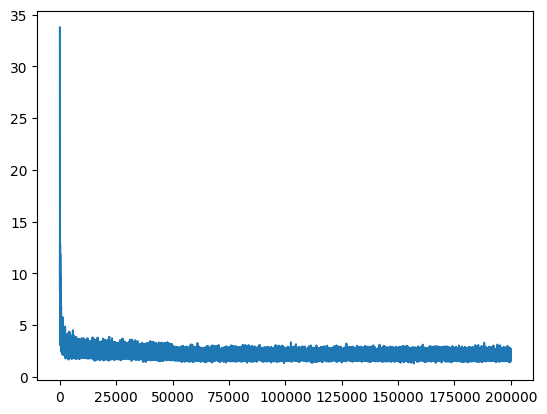

In [ ]:
plt.plot(stepi,lossi)

In [ ]:
#taking loss on test set
emb=C[Xte] # (32,3,10)
h=torch.tanh(emb.view(-1,30)@W1 + b1) #(32,200)
hh=torch.concat([emb.view(-1,30),h],dim=1) # (32,230)
logits= hh @ W2 + b2  # (32,27)
test_loss=F.cross_entropy(logits,Yte)


#taking loss on dev set
emb=C[Xdev] # (32,3,10)
h=torch.tanh(emb.view(-1,30)@W1 + b1) #(32,200)
hh=torch.concat([emb.view(-1,30),h],dim=1) # (32,230)
logits= hh @ W2 + b2  # (32,27)
dev_loss=F.cross_entropy(logits,Ydev)


#taking loss on train set
emb=C[Xtr] # (32,3,10)
h=torch.tanh(emb.view(-1,30)@W1 + b1) #(32,200)
hh=torch.concat([emb.view(-1,30),h],dim=1) # (32,230)
logits= hh @ W2 + b2  # (32,27)
train_loss=F.cross_entropy(logits,Ytr)
print(f'Training loss: {train_loss}, \nValidation loss:{dev_loss}, \nTest loss:{test_loss}')

Training loss: 2.121986150741577, 
Validation loss:2.424550771713257, 
Test loss:2.4537546634674072
